<a href="https://colab.research.google.com/github/m-mwangi/data_preprocessing-group-3/blob/main/Data_Preprocessing_Peer_Group_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DATA LOADING AND CLEANING**

In [ ]:
from google.colab import files
uploaded = files.upload()

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Load the dataset
dataset_path = "customer_transactions.csv"
df = pd.read_csv(dataset_path)

# Display the first few rows
print("\nDataset Preview:")
(df.head())

Saving customer_transactions.csv to customer_transactions.csv

Dataset Preview:


,customer_id_legacy,transaction_id,purchase_amount,purchase_date,product_category,customer_rating
0,151,1001,408,2024-01-01,Sports,2.3
1,192,1002,332,2024-01-02,Electronics,4.2
2,114,1003,442,2024-01-03,Electronics,2.1
3,171,1004,256,2024-01-04,Clothing,2.8
4,160,1005,64,2024-01-05,Clothing,1.3


In [ ]:
# Check for missing values
df.isnull().sum()

,0
customer_id_legacy,0
transaction_id,0
purchase_amount,0
purchase_date,0
product_category,0
customer_rating,10


I've decided to keep the missing values, we'll address them later in data augmentation.

In [ ]:
# Check for duplicate rows
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Number of duplicate rows: 0


In [ ]:
# Check the data types we have
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id_legacy  150 non-null    int64  
 1   transaction_id      150 non-null    int64  
 2   purchase_amount     150 non-null    int64  
 3   purchase_date       150 non-null    object 
 4   product_category    150 non-null    object 
 5   customer_rating     140 non-null    float64
dtypes: float64(1), int64(3), object(2)
memory usage: 7.2+ KB


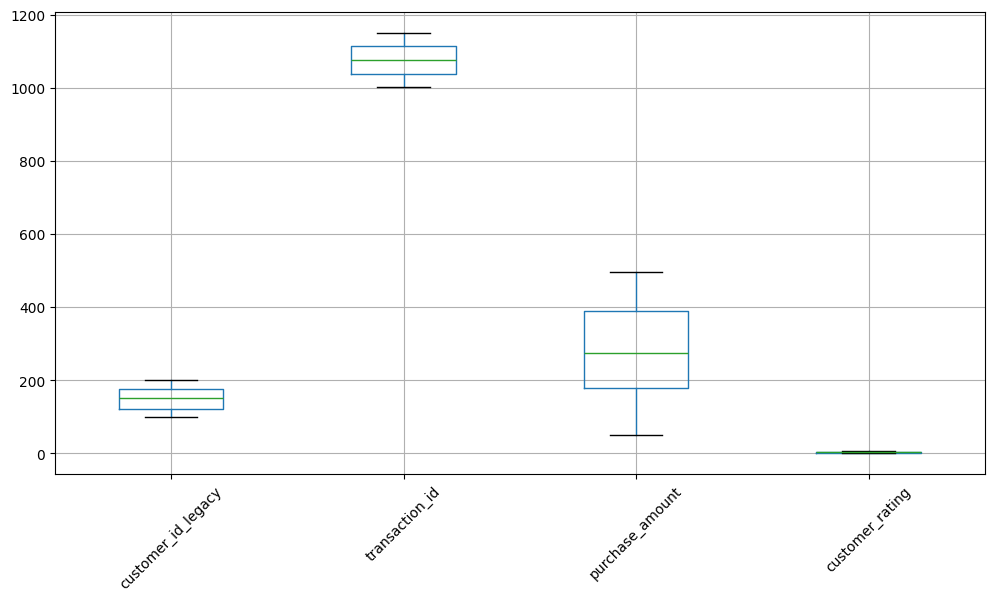

In [ ]:
# Plot boxplots to check for outliers
plt.figure(figsize = (12,6))
df.boxplot()
plt.xticks(rotation = 45)
plt.show()

No outliers detected.

In [ ]:
# Summary statistics of our dataset
print("\nSummary Statistics:")
df.describe()


Summary Statistics:


,customer_id_legacy,transaction_id,purchase_amount,customer_rating
count,150.000000,150.000000,150.000000,140.00000
mean,148.760000,1075.500000,280.780000,2.98500
std,30.046425,43.445368,121.329595,1.20699
min,100.000000,1001.000000,51.000000,1.00000
25%,121.250000,1038.250000,179.000000,1.95000
50%,150.500000,1075.500000,274.000000,3.00000
75%,174.750000,1112.750000,388.500000,4.00000
max,199.000000,1150.000000,495.000000,5.00000



Skewness of purchase_amount: 0.05904654489479159


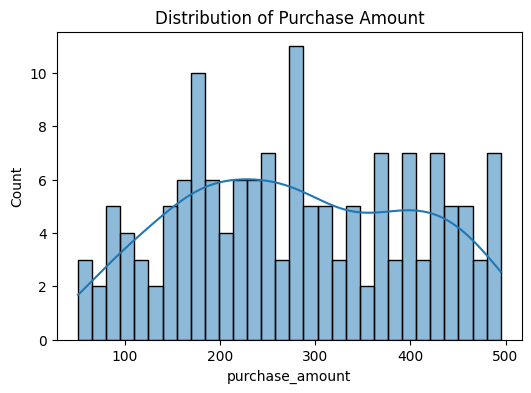

In [ ]:
# Check skewness
print("\nSkewness of purchase_amount:", df['purchase_amount'].skew())

# Plot histogram
plt.figure(figsize = (6,4))
sns.histplot(df['purchase_amount'], bins = 30, kde = True)
plt.title("Distribution of Purchase Amount")
plt.show()

Based on the skewness value, it shows that there is an almost symmetrical distribution.

In [ ]:
# Check for class distribution to know if there exists class imbalance
df['customer_rating'].value_counts()

,count
customer_rating,
4.0,8
1.3,8
1.4,8
4.8,7
4.6,6
2.5,5
1.1,5
4.3,5
3.8,5


**DATA AUGMENTATION**

Synthetic Data Generation: Performing linear interpolation to handle the detected missing values in customer_rating column earlier.

In [ ]:
# Sort data by customer_rating
df = df.sort_values('customer_rating')

# Apply interpolation
df['customer_rating_interpolated'] = df['customer_rating'].interpolate(method = 'linear')

# Check if there are still missing values
df['customer_rating_interpolated'].isnull().sum()

0

Synthetic Data Generation: Adding small variations (Gaussian noise) to the numerical columns (customer_rating and purchasing_amount) to create a slightly altered version of the original dataset.

In [ ]:
import numpy as np

# Define standard deviation for small variations in the numerical columns of 10% and 5% of std deviation respectively
std_purchase = df['purchase_amount'].std() * 0.1
std_rating = df['customer_rating_interpolated'].std() * 0.05

# Add Gaussian noise to create slight variations
df['purchase_amount_noisy'] = df['purchase_amount'] + np.random.normal(0, std_purchase, df.shape[0])
df['customer_rating_noisy'] = df['customer_rating_interpolated'] + np.random.normal(0, std_rating, df.shape[0])

# Ensure customer ratings remain within valid range of 1-5
df['customer_rating_noisy'] = df['customer_rating_noisy'].clip(df['customer_rating_interpolated'].min(), df['customer_rating_interpolated'].max())

# Check distribution
df[['purchase_amount', 'purchase_amount_noisy', 'customer_rating_interpolated', 'customer_rating_noisy']].describe()


,purchase_amount,purchase_amount_noisy,customer_rating_interpolated,customer_rating_noisy
count,150.000000,150.000000,150.000000,150.000000
mean,280.780000,282.021793,3.119333,3.126929
std,121.329595,122.961929,1.270190,1.259644
min,51.000000,43.379711,1.000000,1.014457
25%,179.000000,183.985735,2.100000,2.031613
50%,274.000000,272.586743,3.200000,3.163470
75%,388.500000,393.389234,4.200000,4.196681
max,495.000000,518.610944,5.000000,5.000000



Data Expansion: Generate new synthetic data for the numerical features.

In [ ]:
import pandas as pd
import numpy as np

# Set percentage of new synthetic data which is 20% of original dataset)
synth_size = int(len(df) * 0.2)

# Randomly sample existing transactions from the Noisy dataset
synthetic_df = df.sample(n = synth_size, replace = True, random_state = 42).reset_index(drop = True)

# Append synthetic transactions to original dataset
df_expanded = pd.concat([df, synthetic_df], ignore_index = True)

# Check new dataset size
print("Original dataset size:", len(df))
print("New dataset size after expansion:", len(df_expanded))

# Verify distribution
df_expanded[['purchase_amount_noisy', 'customer_rating_noisy']].describe()

Original dataset size: 150
New dataset size after expansion: 180


,purchase_amount_noisy,customer_rating_noisy
count,180.000000,180.000000
mean,281.107569,3.128260
std,125.727662,1.239248
min,43.379711,1.014457
25%,184.007560,2.048323
50%,272.524830,3.192727
75%,399.253593,4.150518
max,518.610944,5.000000


Visualization to compare before and after augmentation

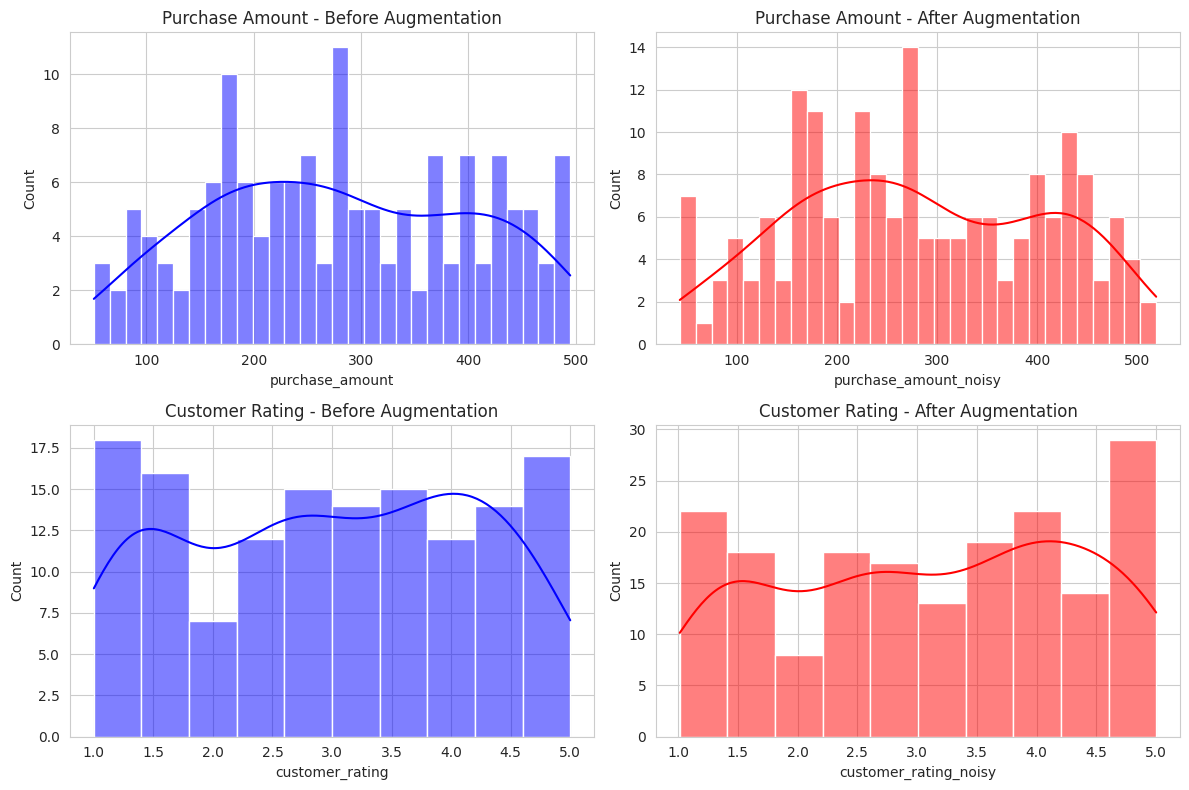

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set_style("whitegrid")

# Create subplots to compare distributions
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Purchase Amount - Before Augmentation
sns.histplot(df['purchase_amount'], bins=30, kde=True, ax=axes[0, 0], color="blue")
axes[0, 0].set_title("Purchase Amount - Before Augmentation")

# Purchase Amount - After Augmentation
sns.histplot(df_expanded['purchase_amount_noisy'], bins=30, kde=True, ax=axes[0, 1], color="red")
axes[0, 1].set_title("Purchase Amount - After Augmentation")

# Customer Rating - Before Augmentation
sns.histplot(df['customer_rating'].dropna(), bins=10, kde=True, ax=axes[1, 0], color="blue")
axes[1, 0].set_title("Customer Rating - Before Augmentation")

# Customer Rating - After Augmentation
sns.histplot(df_expanded['customer_rating_noisy'], bins=10, kde=True, ax=axes[1, 1], color="red")
axes[1, 1].set_title("Customer Rating - After Augmentation")

# Adjust layout
plt.tight_layout()
plt.show()

**SAVING ALL CSV FILES IN A SHARED DRIVE**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Define the correct path to your shared folder
path = "/content/drive/MyDrive/grp3_data_preprocessing_csv_files/"

# Save the augmented dataset
df.to_csv(path + "customer_transactions_augmented.csv", index=False)

print("File saved successfully to Google Drive!")


Mounted at /content/drive
File saved successfully to Google Drive!


**TASK 2: DATASET MERGING WITH TRANSITIVE PROPERTIES**

In [ ]:
# Define the shared folder path
path = "/content/drive/MyDrive/grp3_data_preprocessing_csv_files/"

# Load the datasets
transactions = pd.read_csv(path + "customer_transactions_augmented.csv")
social_profiles = pd.read_csv(path + "customer_social_profiles.csv")
id_mapping = pd.read_csv(path + "id_mapping.csv")

# Display the first few rows of each dataset
print("Transactions Dataset:\n", transactions.head())
print("Social Profiles Dataset:\n", social_profiles.head())
print("ID Mapping Dataset:\n", id_mapping.head())


Transactions Dataset:
    customer_id_legacy  transaction_id  purchase_amount purchase_date  \
0                 113            1150              316    2024-05-29   
1                 138            1050              274    2024-02-19   
2                 107            1065              274    2024-03-05   
3                 120            1006              395    2024-01-06   
4                 149            1071              423    2024-03-11   

  product_category  customer_rating  customer_rating_interpolated  \
0         Clothing              1.0                           1.0   
1      Electronics              1.1                           1.1   
2            Books              1.1                           1.1   
3        Groceries              1.1                           1.1   
4           Sports              1.1                           1.1   

   purchase_amount_noisy  customer_rating_noisy  
0             320.662990               1.014457  
1             272.754641     

In [ ]:
# Merge transactions dataset with id_mapping dataset
transactions_merged = transactions.merge(id_mapping, on="customer_id_legacy", how="left")

# Aggregate transactions to prevent duplicate rows
transactions_grouped = transactions_merged.groupby("customer_id_new").agg({
    "purchase_amount": "sum",
    "purchase_amount_noisy": "sum",
    "customer_rating": "mean",
    "customer_rating_noisy": "mean"
}).reset_index()

#Aggregate social profiles by customer_id_new
social_grouped = social_profiles.groupby("customer_id_new").agg({
    "social_media_platform": lambda x: ", ".join(set(x)),
    "engagement_score": "mean",
    "purchase_interest_score": "mean",
    "review_sentiment": lambda x: ", ".join(set(x))
}).reset_index()

#Merge aggregated social profiles with aggregated transaction data
merged_data = transactions_grouped.merge(social_grouped, on="customer_id_new", how="left")

# Handle missing values
merged_data = merged_data.fillna({
    "social_media_platform": "Unknown",
    "engagement_score": 0,
    "purchase_interest_score": 0,
    "review_sentiment": "No Data"
})

# Save the final dataset
output_path = path + "merged_dataset.csv"
merged_data.to_csv(output_path, index=False)

print("Final dataset saved successfully at:", output_path)
print("Updated Merged Dataset:\n", merged_data.head())

Final dataset saved successfully at: /content/drive/MyDrive/grp3_data_preprocessing_csv_files/merged_dataset.csv
Updated Merged Dataset:
   customer_id_new  purchase_amount  purchase_amount_noisy  customer_rating  \
0            A101              715             733.138919            2.850   
1            A102             1201            1202.954881            3.200   
2            A103              340             355.573173            3.200   
3            A106              986            1013.348350            3.000   
4            A107             1397            1384.984162            1.875   

   customer_rating_noisy social_media_platform  engagement_score  \
0               2.864047               Twitter         68.000000   
1               3.242163              LinkedIn         51.000000   
2               3.126643   Facebook, Instagram         64.333333   
3               2.999433              Facebook         99.000000   
4               1.868772     Facebook, Twitter       

**Feature Engineering And Transformation**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

#Feature extraction from social media platforms
all_platforms = set()
for platforms in merged_data['social_media_platform'].str.split(', '):
    if isinstance(platforms, list):
        all_platforms.update(platforms)

#Create binary columns for each platform
for platform in all_platforms:
    merged_data[f'platform_{platform}'] = merged_data['social_media_platform'].str.contains(platform).astype(int)

#Feature extraction from review sentiments
all_sentiments = set()
for sentiments in merged_data['review_sentiment'].str.split(', '):
    if isinstance(sentiments, list):
        all_sentiments.update(sentiments)

#Create binary columns for each sentiment
for sentiment in all_sentiments:
    merged_data[f'sentiment_{sentiment}'] = merged_data['review_sentiment'].str.contains(sentiment).astype(int)

#Calculate the sentiment score
merged_data['sentiment_score'] = (
    merged_data['sentiment_Positive'].fillna(0) * 1 +
    merged_data['sentiment_Neutral'].fillna(0) * 0 +
    merged_data['sentiment_Negative'].fillna(0) * -1
)

# Create interaction features
merged_data['purchase_engagement_interaction'] = merged_data['purchase_amount'] * merged_data['engagement_score']

# Interaction between purchase amount and sentiment
merged_data['purchase_sentiment_interaction'] = merged_data['purchase_amount'] * merged_data['sentiment_score']

# Create ratio features
# Purchase per engagement
merged_data['purchase_per_engagement'] = merged_data['purchase_amount'] / (merged_data['engagement_score'] + 1)  # Adding 1 to avoid division by zero

# Interest to purchase ratio
merged_data['interest_to_purchase_ratio'] = merged_data['purchase_interest_score'] / (merged_data['purchase_amount'] + 1)  # Adding 1 to avoid division by zero

# Calculate variability between original and noisy data
merged_data['purchase_amount_variability'] = np.abs(merged_data['purchase_amount'] - merged_data['purchase_amount_noisy']) / merged_data['purchase_amount']
merged_data['rating_variability'] = np.abs(merged_data['customer_rating'] - merged_data['customer_rating_noisy'])

# Count number of platforms and sentiments per customer
merged_data['platform_count'] = merged_data['social_media_platform'].str.split(', ').str.len()
merged_data['sentiment_diversity'] = merged_data['review_sentiment'].str.split(', ').str.len()

# Calculate customer scores
# Customer value score (business value)
merged_data['customer_value_score'] = (
    0.4 * merged_data['purchase_amount'] +
    0.3 * merged_data['engagement_score'] +
    0.2 * merged_data['purchase_interest_score'] +
    0.1 * merged_data['customer_rating']
)

# Customer engagement complexity score
merged_data['engagement_complexity_score'] = (
    0.3 * merged_data['platform_count'] +
    0.3 * merged_data['sentiment_diversity'] +
    0.4 * merged_data['engagement_score']
)

#  Normalize key metrics for comparison
scaler = MinMaxScaler()
columns_to_normalize = ['customer_value_score', 'engagement_complexity_score', 'purchase_amount', 'engagement_score']
normalized_columns = scaler.fit_transform(merged_data[columns_to_normalize])
normalized_df = pd.DataFrame(normalized_columns, columns=[f'{col}_normalized' for col in columns_to_normalize])
merged_data = pd.concat([merged_data, normalized_df], axis=1)

#  Calculate percentile ranks for key metrics
merged_data['purchase_amount_percentile'] = merged_data['purchase_amount'].rank(pct=True) * 100
merged_data['engagement_score_percentile'] = merged_data['engagement_score'].rank(pct=True) * 100
merged_data['customer_value_percentile'] = merged_data['customer_value_score'].rank(pct=True) * 100

#  Create customer segments based on value and engagement
value_thresholds = merged_data['customer_value_score'].quantile([0.33, 0.67]).tolist()
engagement_thresholds = merged_data['engagement_score'].quantile([0.33, 0.67]).tolist()

# Create segment labels
def value_segment(x):
    if x <= value_thresholds[0]:
        return 'Low Value'
    elif x <= value_thresholds[1]:
        return 'Medium Value'
    else:
        return 'High Value'

def engagement_segment(x):
    if x <= engagement_thresholds[0]:
        return 'Low Engagement'
    elif x <= engagement_thresholds[1]:
        return 'Medium Engagement'
    else:
        return 'High Engagement'

merged_data['value_segment'] = merged_data['customer_value_score'].apply(value_segment)
merged_data['engagement_segment'] = merged_data['engagement_score'].apply(engagement_segment)
merged_data['customer_segment'] = merged_data['value_segment'] + ' - ' + merged_data['engagement_segment']

# Define the output path
output_path = path + "final_customer_data_group3.csv"

# Save the final dataset
merged_data.to_csv(output_path, index=False)

print("Final dataset saved successfully at:", output_path)
print("Final dataset shape:", merged_data.shape)
print("Updated Dataset with Features (first 5 rows):\n", merged_data.head())
print("\nFeature columns added:", [col for col in merged_data.columns if col not in ['customer_id_new', 'purchase_amount', 'purchase_amount_noisy',
                                                                                     'customer_rating', 'customer_rating_noisy', 'social_media_platform',
                                                                                     'engagement_score', 'purchase_interest_score', 'review_sentiment']])

Final dataset saved successfully at: /content/drive/MyDrive/grp3_data_preprocessing_csv_files/final_customer_data_group3.csv
Final dataset shape: (65, 40)
Updated Dataset with Features (first 5 rows):
   customer_id_new  purchase_amount  purchase_amount_noisy  customer_rating  \
0            A101              715             733.138919            2.850   
1            A102             1201            1202.954881            3.200   
2            A103              340             355.573173            3.200   
3            A106              986            1013.348350            3.000   
4            A107             1397            1384.984162            1.875   

   customer_rating_noisy social_media_platform  engagement_score  \
0               2.864047               Twitter         68.000000   
1               3.242163              LinkedIn         51.000000   
2               3.126643   Facebook, Instagram         64.333333   
3               2.999433              Facebook         99